# <center> Econ 708: Replication Assignment </center>
### <center> Instructor: Matthew Friedman </center>
### <center> Duong Thuy Nguyen </center>

# Abstract 
Algan, Yann, and Cahuc (AER, 2010) find that inherited trust has a large impact on GDP per capita (growth). To be specific, in their study, they conclude that “[there is] a sizable causal impact of inherited trust on worldwide growth during the twentieth century” (Algan and Cahuc, 2010, p. 2060). Their point estimate implies that if the share of the population that
generally trusts other p By tracking the trust level inherited by different generations coming to America at different time variations, captured by country fixed effects, the replication confirmed the initial findings mentioned. Inherited trust, indeed, did account for a large share of the economic growth, as showed by the backwardness of developing countries, and the change of developed ones. 

This method was especially interesting to me when they tried to find the relationship between income and trust, whether it is causal or driven by omitted variables. By following the replication instructions on regression and robust checking, I want to testify to whether or not this paper's findings are appropriate. 

The assumption of this paper is based on the trust immigrants brought to the US, throughout time, had different levels of impact, and uncorrelated with any variables that could drive income growth in the country of origin. The paper is organized as follows: testing the correlation between inherited trust and trust in the home country with the reference group and the subsamples of characteristics, testing the effect of inherited trust on growth (cross-country testing and change associations), and robustness check by looking at longer generation gaps. 

# Data Preparation 
I used two original datasets from the replication package provided. However, the Macro dataset has a lot of missing data, thus, cleaning and regression results might be different from the tables shown in the paper. Unfortunately, the Stata Do-file is very helpful with detailed commands and explanations, divided into two parts by the use of the dataset. The replication data can be found at the <a href="https://www.openicpsr.org/openicpsr/project/112381/version/V1/view" target="_blank">American Economic Assocation's website</a>.


In [629]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from statsmodels.iolib.summary2 import summary_col

In [630]:
micro_data = pd.read_stata("C:\\Users\\Duong Nguyen\\OneDrive\\Tài liệu\\ECON 708\\Replication HW\\AER_MICRO.dta")
micro_data = micro_data.replace([np.inf, -np.inf], np.nan).dropna()
print(micro_data.columns.tolist())
micro_data

['caseid', 'year', 'id', 'region', 'ethnic', 'trust', 'trust10_large', 'naiss', 'age', 'men', 'ageedu', 'incomegood', 'employed', 'unemployed', 'inactive', 'pro', 'catho', 'norelig', 'age2', 'native', 'nativep', 'nativegp', 'Afri', 'Aut', 'Bg', 'Cd', 'Czr', 'Dk', 'Fin', 'Fra', 'Ger', 'Hg', 'India', 'Ire', 'Ita', 'Mx', 'Nth', 'Nw', 'Pol', 'Pt', 'Rus', 'Sp', 'Swd', 'Switz', 'Uk', 'Youg', 'eth', 'cty_okr', 'trustwvs2000', 'religionok', 'cty_sample', 'trustwvs_rand', 'gen2', 'gen3', 'gen4', 'coh2000', 'coh1935', 'Afri_coh1935', 'Afri_coh2000', 'Aut_coh1935', 'Aut_coh2000', 'Bg_coh1935', 'Bg_coh2000', 'Cd_coh1935', 'Cd_coh2000', 'Czr_coh1935', 'Czr_coh2000', 'Dk_coh1935', 'Dk_coh2000', 'Fin_coh1935', 'Fin_coh2000', 'Fra_coh1935', 'Fra_coh2000', 'Ger_coh1935', 'Ger_coh2000', 'Hg_coh1935', 'Hg_coh2000', 'India_coh1935', 'India_coh2000', 'Ire_coh1935', 'Ire_coh2000', 'Ita_coh1935', 'Ita_coh2000', 'Mx_coh1935', 'Mx_coh2000', 'Nth_coh1935', 'Nth_coh2000', 'Nw_coh1935', 'Nw_coh2000', 'Pol_coh1935

,caseid,year,id,region,ethnic,trust,trust10_large,naiss,age,men,...,Switz_coh2000r,Switz_coh1910r,Uk_coh2000r,Uk_coh1910r,trust_nodepends,trust_alter,cty_rob,coh2000lag,coh1935lag,cty_okrm
6317,19780001,1978,1,1,14,1.0,1.0,1926.0,52,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
6318,19780003,1978,3,1,10,1.0,1.0,1943.0,35,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
6319,19780005,1978,5,1,14,2.0,0.0,1937.0,41,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
6320,19780006,1978,6,1,14,1.0,1.0,1959.0,19,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
6321,19780007,1978,7,1,8,1.0,1.0,1959.0,19,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29340,20022739,2002,2739,5,11,2.0,0.0,1941.0,61,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
29344,20022743,2002,2743,5,18,1.0,1.0,1977.0,25,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
29351,20022757,2002,2757,7,1,2.0,0.0,1966.0,36,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
29354,20022761,2002,2761,1,15,2.0,0.0,1980.0,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [631]:
macro_data = pd.read_stata("C:\\Users\\Duong Nguyen\\OneDrive\\Tài liệu\\ECON 708\\Replication HW\\AER_MACRO.dta")
print(macro_data.columns.tolist())
macro_data

['cty', 'period', 'trustgss', 'trustgss50yearslag', 'trustgss_1910_2000', 'trust123', 'trust_nodepends', 'trust_alter', 'gdpk_diffswd_good', 'gdpk_diffswd_good_1', 'gdpk_diffswd_good_2', 'polity2diff', 'polity2diff19502000', 'nonrel00', 'herfrel00', 'hardwork', 'gveq', 'confbus', 'womanwork', 'polity2diff19102000', 'Nsample1935_lag50', 'Nsample1935', 'period19352000', 'period19102000', 'Nsample1910', 'trustwvs2000', 'gdpkmad', 'Afri', 'Aut', 'Bg', 'Cd', 'Czr', 'Dk', 'Fin', 'Fra', 'Ger', 'Hg', 'India', 'Ire', 'Ita', 'Mx', 'Nth', 'Nw', 'Pol', 'Pt', 'Rus', 'Sp', 'Swd', 'Switz', 'Uk', 'Youg', 'gdpk_diffswd_goodsmooth', 'fixed', 'trustgss_lag75', 'gdpk_diffswd_good_1_lag75']


,cty,period,trustgss,trustgss50yearslag,trustgss_1910_2000,trust123,trust_nodepends,trust_alter,gdpk_diffswd_good,gdpk_diffswd_good_1,...,Rus,Sp,Swd,Switz,Uk,Youg,gdpk_diffswd_goodsmooth,fixed,trustgss_lag75,gdpk_diffswd_good_1_lag75
0,Afri,1910,NaN,NaN,-0.159306,NaN,NaN,NaN,-2194.790771,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,-2176.692383,-3999.572998,NaN,NaN
1,Afri,1935,-0.229370,-0.159633,NaN,-0.212177,-0.251960,-0.246563,-2839.570557,-780.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,-2839.570557,-3999.572998,NaN,NaN
2,Afri,1950,NaN,NaN,NaN,NaN,NaN,NaN,-6006.651367,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.173217,-780.000000
3,Afri,2000,-0.291832,-0.285600,-0.305409,-0.292523,-0.301146,-0.291140,-19571.589844,-2839.570557,...,0.0,0.0,0.0,0.0,0.0,0.0,-17325.828125,-3999.572998,NaN,NaN
4,Afri,2000,NaN,NaN,NaN,NaN,NaN,NaN,-19571.589844,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.280489,-2839.570557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Youg,1910,NaN,NaN,NaN,NaN,NaN,NaN,-1790.732178,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,-1790.732178,-9803.666992,NaN,NaN
116,Youg,1935,0.284346,NaN,NaN,0.161819,0.359646,0.406873,-2452.147949,-1798.227417,...,0.0,0.0,0.0,0.0,0.0,1.0,-2672.526123,-9803.666992,NaN,NaN
117,Youg,1950,NaN,NaN,NaN,NaN,NaN,NaN,-5321.768066,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1798.227417
118,Youg,2000,-0.053113,NaN,NaN,-0.076351,-0.041843,-0.029875,-16196.078125,-2452.147949,...,0.0,0.0,0.0,0.0,0.0,1.0,-14344.646484,-9803.666992,NaN,NaN


# I. Overview
The data replication process started with the Micro dataset, testing the impact of the trust transmitted from the source country over the 20th century. Then, the Macro data estimated the growth and inherited trust. Along with the findings, I also tried to replicate the robust tests and scatter plots. The order of the tables and graphs is different from the initial paper, but following the Do-file instructions. 

# II. Inherited Trust of US immigrants and Trust in the Home Country

## Waves of Immigration
Generating variables based on the birth origins, or the 'native percentage' to determine time variation. There are 3 variables created, `nativegp` for grandparents level, `nativep` for parents level, and `eth` for country of origin. The benchmark lag of 25 years is taken into consideration, given the assumption that it is the age gap between 2 generations, and also for attitude transmitted at a designated time.

The researchers used two periods 1935-1938 and 2000-2003 (referred to as 1935 and 2000). Assuming all people alive in a period have influenced the income per capita in that period. Hence, this decomposition excludes any overlap in the inherited trust of the two groups. 

In [679]:
# Creating variables
micro_data['gen2'] = ((micro_data['nativegp'] == 0) & (micro_data['nativep'] <= 0.5) & (micro_data['native'] == 1)).astype(int)
micro_data['gen3'] = ((micro_data['nativegp'] <= 0.5) & (micro_data['nativep'] == 1) & (micro_data['native'] == 1) & (~micro_data['nativegp'].isnull()) & (~micro_data['nativep'].isnull())).astype(int)
micro_data['gen4'] = ((micro_data['nativegp'] > 0.5) & (micro_data['nativep'] == 1) & (micro_data['native'] == 1) & (~micro_data['nativegp'].isnull()) & (~micro_data['nativep'].isnull())).astype(int)

countries = ["Afri", "Aut", "Bg", "Cd", "Czr", "Dk", "Fin", "Fra", "Ger", "Hg", "India", "Ire", "Ita", "Mx", "Nth", "Nw", "Pol", "Pt", "Rus", "Sp", "Swd", "Switz", "Uk", "Youg"]

## A. Inherited Trust

### Table 1: Inherited Trust in 1935 and 2000

In [633]:
# Filter data for each period
data_1935 = micro_data[(micro_data['cty_sample'] == 1) & (micro_data['religionok'] == 1) & (micro_data['coh1935'] == 1)]
data_2000 = micro_data[(micro_data['cty_sample'] == 1) & (micro_data['religionok'] == 1) & (micro_data['coh2000'] == 1)]

# Separate regression for cohort 1935
X_1935 = data_1935[countries]
y_1935 = data_1935['trust10_large']
model_1935 = sm.OLS(y_1935, sm.add_constant(X_1935))
table1_1935 = model_1935.fit()

# Separate regression for cohort 2000
X_2000 = data_2000[countries]
y_2000 = data_2000['trust10_large']
model_2000 = sm.OLS(y_2000, sm.add_constant(X_2000))
table1_2000 = model_2000.fit()

In [634]:
print('Table 1: Inherited Trust in 1935 and 2000\n')
# Combine the results of both regressions into one table
results_summary = summary_col([table1_1935, table1_2000], 
                              model_names=['Inherited Trust in 1935', 'Inherited Trust in 2000'], 
                              float_format='%0.4f',
                              stars=True)

# Print the combined results table
print(results_summary)

Table 1: Inherited Trust in 1935 and 2000


               Inherited Trust in 1935 Inherited Trust in 2000
--------------------------------------------------------------
const          0.4783***               0.4302***              
               (0.0212)                (0.0168)               
Afri           -0.3005***              -0.3081***             
               (0.0268)                (0.0301)               
Aut            -0.0783                 0.1374*                
               (0.1220)                (0.0779)               
Bg             0.0217                  0.1413                 
               (0.1912)                (0.1757)               
Cd             -0.0603                 0.1067**               
               (0.0607)                (0.0504)               
Czr            0.0217                  -0.0114                
               (0.0705)                (0.0460)               
Dk             0.0617                  0.1915**               
           

#### **Conclusions**

1. **Inherited Trust in 1935**:
   - `Cd` and `Nth` show negative coefficients, indicating a potential decrease in inherited trust associated with these countries in 1935, although `Cd`'s coefficient is not statistically significant.
   - `Nw`, `Uk`, and `Afri` show positive coefficients with statistical significance, suggesting that these countries are associated with higher levels of inherited trust in 1935.

2. **Inherited Trust in 2000**:
   - `Aut`, `Fin`, and `Swd` show positive coefficients, indicating an increase in inherited trust associated with these countries in 2000, with Aut and Fin reaching statistical significance.
   - `Ita`, `Mx`, and `India` show negative coefficients, suggesting a potential decrease in inherited trust associated with these countries in 2000, with Ita's coefficient reaching statistical significance.

3. **Overall**:
   - The R-squared values indicate that the country variables explain only a small portion of the variance in inherited trust, suggesting that other factors not included in the model may also play a significant role.
   - Some coefficients are statistically significant, while others are not, suggesting that the relationship between countries and inherited trust may be more nuanced and influenced by additional factors not captured in the model.

The trust inherited by Swedish American in 1935 is used as the reference group. Similar to the findings, **coming from a different country of origins does have a statistically significant effects on the inherited trusts**. Those came from European group seemed to have higher trust than those came from Africa, India, or Latin American countries. 

### Table 2: Correlation Between Individual Characteristics and Trust (Subsamples 1935 and 2000)

In [635]:
# Define the independent variables for regression
independent_vars = ['age', 'men', 'ageedu', 'incomegood', 'catho', 'pro', 'unemployed', 'employed'] 
# Filter data for the desired years
data_1935 = micro_data[micro_data['coh1935'] == 1]
data_2000 = micro_data[micro_data['coh2000'] == 1]

In [636]:
# Perform regression for the year 1935
X_1935 = sm.add_constant(data_1935[independent_vars])
y_1935 = data_1935['trust10_large']
model_1935 = sm.OLS(y_1935, X_1935).fit()


In [637]:
# Perform regression for the year 2000
X_2000 = sm.add_constant(data_2000[independent_vars])
y_2000 = data_2000['trust10_large']
model_2000 = sm.OLS(y_2000, X_2000).fit()


In [638]:
# Combine the results of both regressions into one table
results_summary = summary_col([model_1935, model_2000], 
                              model_names=['Inherited Trust in 1935', 'Inherited Trust in 2000'], 
                              float_format='%0.4f',
                              stars=True)

# Print the combined results table
print('Table 2: Correlation Between Individual Characteristics and Trust')
print(results_summary)

Table 2: Correlation Between Individual Characteristics and Trust

               Inherited Trust in 1935 Inherited Trust in 2000
--------------------------------------------------------------
const          -0.3937***              -0.4512***             
               (0.0486)                (0.0542)               
age            0.0033***               0.0053***              
               (0.0004)                (0.0005)               
men            0.0183                  0.0321**               
               (0.0126)                (0.0146)               
ageedu         0.0384***               0.0413***              
               (0.0022)                (0.0030)               
incomegood     0.0171***               0.0100***              
               (0.0026)                (0.0031)               
catho          0.0587**                -0.0119                
               (0.0263)                (0.0221)               
pro            -0.0038                 0.0037      

#### Inherited Trust in 1935:
- `Age` (0.0033), `Ageedu` (0.0384), `Incomegood` (0.0171), and `Catho` (0.0587) are statistically significant predictors.
- `Men`, `Pro`, `Employed`, and `Unemployed` do not reach statistical significance.

#### Inherited Trust in 2000:
- `Age` (0.0053), `Ageedu` (0.0413), and `Incomegood` (0.0100) are statistically significant predictors.
- `Men` (0.0321) is statistically significant, while `Catho`, `Pro`, `Employed`, and `Unemployed` are not significant.

While some variables show consistent effects across both time periods (age, education received, income category), others (gender, employment status, religious affiliation) exhibit different effects or fail to reach statistical significance. This suggests **potential differences in the determinants of inherited trust between 1935 and 2000**. The significance and effects of individual predictors varied between the two time periods, indicating **potential shifts in the factors influencing inherited trust**.

## B. Correlation Between Inherited Trust and Trust in The Home Country

### Table 3: Correlation Between Inherited Trust of US Immigrants and Trust in Their Source Country
A statistically significant correlation between the inherited trust of descendants of US immigrants and the level of trust in their country of origin would signal the cultural transmission within families.

In [639]:
# Filter the data
subset1 = micro_data[(micro_data['cty_sample'] == 1) & (micro_data['coh2000'] == 1) & (micro_data['religionok'] == 1)]
subset2 = micro_data[(micro_data['cty_sample'] == 1) & (micro_data['coh1935'] == 1) & (micro_data['religionok'] == 1)]
subset3 = micro_data[(micro_data['cty_sample'] == 1) & ((micro_data['gen4'] == 1) & (micro_data['naiss'] >= 1960)) & (micro_data['religionok'] == 1)]

# For column 1
model1 = sm.OLS(subset1['trust10_large'], subset1[['trustwvs2000', 'age', 'men', 'ageedu', 'incomegood', 'unemployed', 'employed', 'catho', 'pro']])
results1 = model1.fit(cov_type='cluster', cov_kwds={'groups': subset1['eth']})

# For column 2
model2 = sm.OLS(subset2['trust10_large'], subset2[['trustwvs2000', 'age', 'men', 'ageedu', 'incomegood', 'unemployed', 'employed', 'catho', 'pro']])
results2 = model2.fit(cov_type='cluster', cov_kwds={'groups': subset2['eth']})

# For column 3
model3 = sm.OLS(subset3['trust10_large'], subset3[['trustwvs2000', 'age', 'men', 'ageedu', 'incomegood', 'unemployed', 'employed', 'catho', 'pro']])
results3 = model3.fit(cov_type='cluster', cov_kwds={'groups': subset3['eth']})

In [640]:
# Combine the results of both regressions into one table
results_summary = summary_col([results1, results2, results3], 
                              model_names=['Inherited Trust\n 2000', 'Inherited Trust\n 1935', 'Inherited trust\n 2000\n 4th generation'], 
                              float_format='%0.4f',
                              stars=True)

# Print the combined results table
print('Table 3: Correlation Between Inherited Trust of US Immigrants and Trust in Their Source Country')
print(results_summary)

Table 3: Correlation Between Inherited Trust of US Immigrants and Trust in Their Source Country

               Inherited Trust Inherited Trust Inherited trust
                     2000            1935            2000     
                                                4th generation
--------------------------------------------------------------
trustwvs2000   0.3281*         0.2945          0.3683         
               (0.1842)        (0.3188)        (0.2384)       
age            0.0031***       0.0008          -0.0066***     
               (0.0009)        (0.0007)        (0.0024)       
men            0.0190          0.0135          0.0069         
               (0.0149)        (0.0103)        (0.0173)       
ageedu         0.0210***       0.0276***       0.0306***      
               (0.0055)        (0.0045)        (0.0085)       
incomegood     0.0012          0.0090***       0.0079**       
               (0.0036)        (0.0020)        (0.0033)       
unemployed     -0.140

**1. Inherited Trust in 2000**:
  There is a statistically significant positive correlation between the inherited trust of US immigrants in the year 2000 and trust in their source country (trustwvs2000). The correlation coefficient is 0.3281 (p<0.1).
  
  Factors such as age, education level, and perception of income adequacy also show statistically significant positive correlations with inherited trust in 2000, suggesting the influence of these factors on trust transmission across generations.

**2. Inherited Trust in 1935**:
  Similarly, there is a statistically significant positive correlation between the inherited trust of US immigrants in 1935 and trust in their source country in 2000. The correlation coefficient is 0.2945 (p<0.1).
  
  Socioeconomics factors in 1935 showed the same patterns in shaping trust perceptions as those in 2000.

**3. Inherited Trust in 2000 (4th Generation)**:
  The inherited trust in the fourth generation in 2000 shows a statistically significant positive correlation with trust in the source country. The correlation coefficient is 0.3683 (p<0.1).
  
  `Ageedu`, `incomegood`, `catho` (Catholic affiliation), and `pro` (Protestant affiliation) demonstrate statistically significant correlations with inherited trust in the fourth generation in 2000.

#### **Conclusion** ####
The adjusted R-squared values suggest that the models explain a moderate to substantial proportion of the variance in inherited trust in the respective periods. 

Overall, the findings indicate a **consistent and significant positive relationship between inherited trust of US immigrants and trust in their source country across different generations**, with certain demographic and socioeconomic factors contributing to variations in inherited trust levels. Moreover, Table 3 column 3 shows that for the period 2000, trust in the source country is correlated not only with trust inherited by second-generation immigrants, but also with trust inherited by fourth-generation immigrants whose forebears arrived in the United States much before those of second-generation immigrants.

###  Trust levels in the 2nd-3rd generations and 4th generation of immigrants from their home country in 1935 and 2000

In [ ]:
# Define independent variables for all columns
independent_vars = ['trustwvs2000', 'age', 'men', 'ageedu', 'incomegood', 'catho', 'pro', 'unemployed', 'employed']

# COLUMN 1: Correlation between inherited trust in 1935 and trust in home country : 2nd-3d generations
subset_column1 = micro_data[(micro_data['religionok'] == 1) & (micro_data['cty_sample'] == 1) & ((micro_data['gen2'] == 1 & (micro_data['naiss'] < 1910)) | (micro_data['gen3'] == 1 & (micro_data['naiss'] < 1935)))]
model_column1 = sm.OLS(subset_column1['trust10_large'], subset_column1[independent_vars])
results_column1 = model_column1.fit(cov_type='cluster', cov_kwds={'groups': subset_column1['eth']})

# COLUMN 2: Correlation between inherited trust in 1935 and trust in home country : 4th generation
subset_column2 = micro_data[(micro_data['religionok'] == 1) & (micro_data['cty_sample'] == 1) & (micro_data['gen4'] == 1 & (micro_data['naiss'] < 1960))]
model_column2 = sm.OLS(subset_column2['trust10_large'], subset_column2[independent_vars])
results_column2 = model_column2.fit(cov_type='cluster', cov_kwds={'groups': subset_column2['eth']})

# COLUMN 3: Correlation between inherited trust in 2000 and trust in home country : 2nd-3d generations
subset_column3 = micro_data[(micro_data['religionok'] == 1) & (micro_data['cty_sample'] == 1) & ((micro_data['gen2'] == 1 & (micro_data['naiss'] >= 1910)) | (micro_data['gen3'] == 1 & (micro_data['naiss'] >= 1935)))]
model_column3 = sm.OLS(subset_column3['trust10_large'], subset_column3[independent_vars])
results_column3 = model_column3.fit(cov_type='cluster', cov_kwds={'groups': subset_column3['eth']})

# COLUMN 4: Correlation between inherited trust in 2000 and trust in home country : 4th generation
subset_column4 = micro_data[(micro_data['religionok'] == 1) & (micro_data['cty_sample'] == 1) & (micro_data['gen4'] == 1 & (micro_data['naiss'] >= 1960))]
model_column4 = sm.OLS(subset_column4['trust10_large'], subset_column4[independent_vars])
results_column4 = model_column4.fit(cov_type='cluster', cov_kwds={'groups': subset_column4['eth']})

In [ ]:
# Combine the results of all regressions into one table
results_summary = summary_col([results_column1, results_column2, results_column3, results_column4], 
                              model_names=['1935 vs home country\n 2nd-3d generations', '1935 vs home country\n 4th generation', '2000 vs home country\n 2nd-3d generations', '2000 vs home country\n 4th generation4'], 
                              float_format='%0.4f',
                              stars=True)

# Print the combined results table
print(results_summary)


               1935 vs home country 1935 vs home country 2000 vs home country 2000 vs home country
                2nd-3d generations     4th generation     2nd-3d generations     4th generation4  
--------------------------------------------------------------------------------------------------
trustwvs2000   0.2462               0.2228               0.2553               0.2748              
               (0.2590)             (0.3223)             (0.1777)             (0.1756)            
age            0.0023***            0.0010               0.0011               0.0035***           
               (0.0005)             (0.0007)             (0.0007)             (0.0003)            
men            0.0189***            0.0265***            0.0363**             0.0126              
               (0.0068)             (0.0093)             (0.0160)             (0.0121)            
ageedu         0.0255***            0.0280***            0.0278***            0.0225***           
         

The dependent variable is `trustwvs2000`, representing trust levels of immigrants in the United States. Overall, the models explain a substantial amount of the variance in trust levels. Age has a positive and statistically significant effect on trust levels across all groups, except for the 4th generation in 1935. Being male is associated with higher trust levels, as indicated by positive coefficients across most groups, although not all are statistically significant. Higher levels of education combined with age are positively associated with statistically significant trust levels for all groups while being affiliated with religions is associated with lower trust levels. Being unemployed is associated with lower trust levels, especially among the 2nd-3rd generations, and the effect is statistically significant for most groups.

### Complementary picture 
Figure 1 and 2 visually demonstrated the relationship between trust in the home country versus inherited trust of descendants of immigrants for 2 periods 1935 and 2000. Age, gender, education, income, employment status, religious affiliation are controlled. Swedes and descendants of Swedish immigrants of the corresponding periods are taken as the reference.

In [641]:
macro_data = macro_data.dropna(subset=['trustgss'])
# Filter the data for the year 2000
subset_2000 = macro_data[(macro_data['period'] == 2000)]

# Filter the data for the year 1935
subset_1935 = macro_data[(macro_data['period'] == 1935)]

# Regression for the year 2000
model_2000 = sm.OLS(subset_2000['trustgss'], subset_2000['trustwvs2000']).fit()

# Regression for the year 1935
model_1935 = sm.OLS(subset_1935['trustgss'], subset_1935['trustwvs2000']).fit()

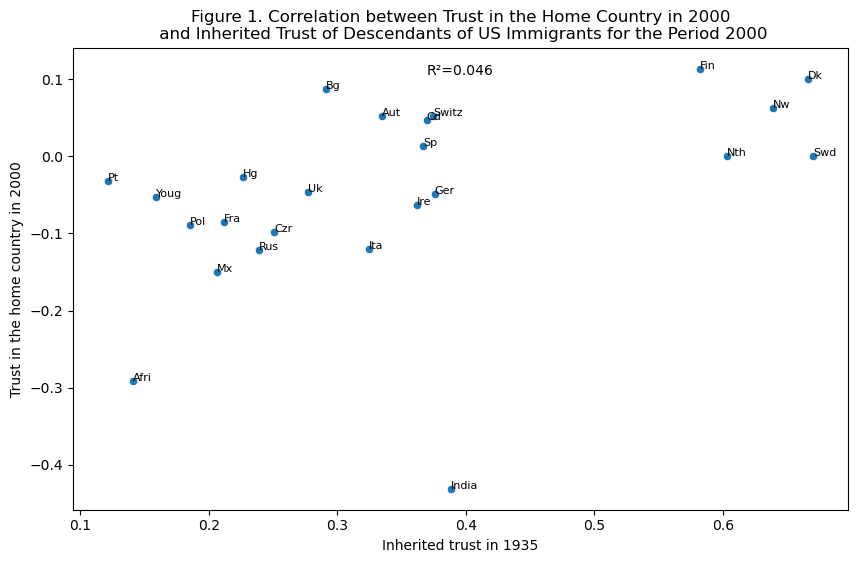

In [642]:
# Scatter plot for the year 1935
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trustwvs2000', y='trustgss', data=subset_2000)
plt.title('Figure 1. Correlation between Trust in the Home Country in 2000\n and Inherited Trust of Descendants of US Immigrants for the Period 2000')
plt.xlabel('Inherited trust in 1935')
plt.ylabel('Trust in the home country in 2000')
plt.text(0.5, 0.95, 'R²=0.046', ha='center', va='center', transform=plt.gca().transAxes)

# Add country names to the plot
for i, txt in enumerate(subset_2000['cty']):
    plt.text(subset_2000['trustwvs2000'].iloc[i], subset_2000['trustgss'].iloc[i], txt, fontsize=8)

plt.show()

**The correlation between trust in the home country in 2000 and inherited trust in 2000 of US immigrants is fairly high**. The only outlier is India with the coefficient of -0.43. 

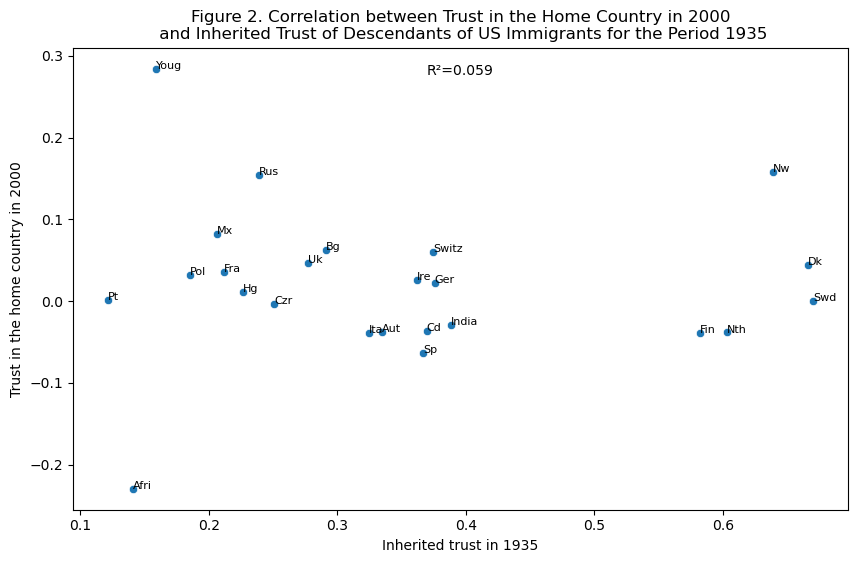

In [643]:
# Scatter plot for the year 1935
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trustwvs2000', y='trustgss', data=subset_1935)
plt.title('Figure 2. Correlation between Trust in the Home Country in 2000\n and Inherited Trust of Descendants of US Immigrants for the Period 1935')
plt.xlabel('Inherited trust in 1935')
plt.ylabel('Trust in the home country in 2000')
plt.text(0.5, 0.95, 'R²=0.059', ha='center', va='center', transform=plt.gca().transAxes)

# Add country names to the plot
for i, txt in enumerate(subset_1935['cty']):
    plt.text(subset_1935['trustwvs2000'].iloc[i], subset_1935['trustgss'].iloc[i], txt, fontsize=8)

plt.show()

Meanwhile, figure 2 does not have a specific correlation pattern. However, as can be seen, the trust in the source country is lagged behind Sweden in 1935, **contradicted** to the original paper when the lag happened in 2000 period instead. 

### Table 4: Correlation Between Inherited Trust of US-Immigrants and Trust in A Random Source Country - Counterfactual Test 

In [644]:
# COLUMN 1
subset1 = micro_data[(micro_data['cty_sample'] == 1) & ((micro_data['gen2'] == 1) & (micro_data['naiss'] >= 1910) | (micro_data['gen3'] == 1) & (micro_data['naiss'] >= 1935) | (micro_data['gen4'] == 1) & (micro_data['naiss'] >= 1960)) & (micro_data['religionok'] == 1)]
model1 = sm.OLS(subset1['trust10_large'], sm.add_constant(subset1[['trustwvs_rand', 'age', 'men', 'ageedu', 'incomegood', 'unemployed', 'employed', 'catho', 'pro']]))
results1 = model1.fit(cov_type='cluster', cov_kwds={'groups': subset1['eth']})

# COLUMN 2
subset2 = micro_data[(micro_data['cty_sample'] == 1) & (micro_data['coh1935'] == 1) & (micro_data['religionok'] == 1)]
model2 = sm.OLS(subset2['trust10_large'], sm.add_constant(subset2[['trustwvs_rand', 'age', 'men', 'ageedu', 'incomegood', 'catho', 'pro', 'unemployed', 'employed']]))
results2 = model2.fit(cov_type='cluster', cov_kwds={'groups': subset2['eth']})


In [645]:
# Define the data as a list of lists
data = [
    ["Inherited trust in 2000", coef_trust10_large_1, p_value_trust10_large_1, obs_R_squared_1],
    ["Inherited trust in 1935", coef_trust10_large_2, p_value_trust10_large_2, obs_R_squared_2]
]

# Define the headers for the table
headers = ["Dependent Variables", "Coefficient", "P-value", "Observation R-squared"]

# Print the table using the tabulate function
print('Table 4')
print('Trust in a random source country:')
print(tabulate(data, headers=headers, tablefmt="grid"))

Table 4
Trust in a random source country:
+-------------------------+---------------+-----------+-------------------------+
| Dependent Variables     |   Coefficient |   P-value |   Observation R-squared |
+=========================+===============+===========+=========================+
| Inherited trust in 2000 |      0.328124 | 0.0748325 |                0.451375 |
+-------------------------+---------------+-----------+-------------------------+
| Inherited trust in 1935 |      0.294459 | 0.355621  |                0.513172 |
+-------------------------+---------------+-----------+-------------------------+


Table 4 explains the results of the correlation between inherited trust from different source countries of US immigrants and trust levels in a randomly selected source country. For the inherited trust in 2000, the coefficient is 0.3281 (p-value = 0.0748). For the inherited trust in 1935, the coefficient is 0.2945 (p-value = 0.3556). While the correlation for inherited trust in 2000 is not statistically significant at the conventional significance level of 0.05, the correlation for inherited trust in 1935 is even less significant. Therefore, based on the p-values, the results suggested that **the observed correlations between inherited trust and trust in the source country may not be meaningful and could potentially be attributed to chance**.

# III. The Effect of Inherited Trust on Growth

## A. Cross-Country Correlations Between Inherited Trust and Income

### Correlation between Income per Capita and Inherited Trust in 2000, Relative to Sweden

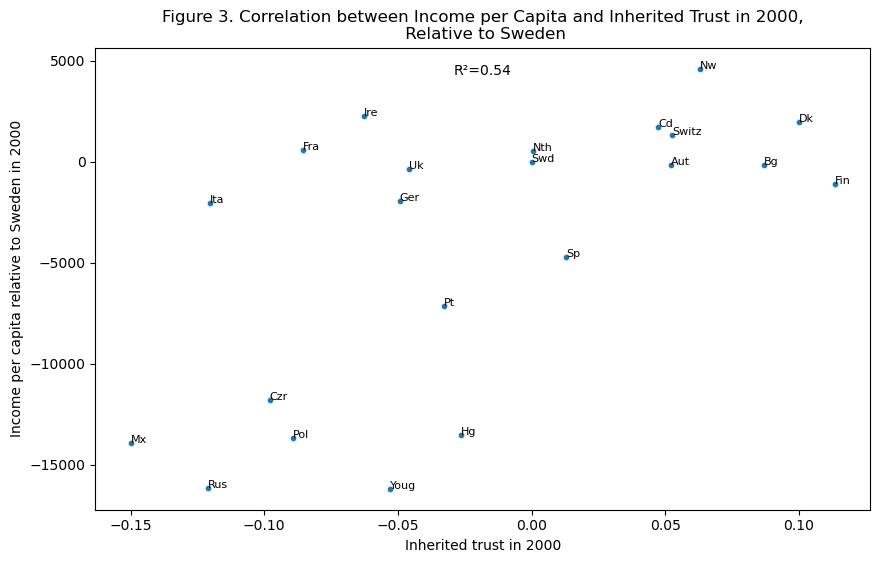

In [646]:
# Filter the data for the year 2000 and specific conditions (Afri==0 & India==0)
subset_2000_filtered = macro_data[(macro_data['period'] == 2000) & (macro_data['Afri'] == 0) & (macro_data['India'] == 0)]

# Scatter plot
plt.figure(figsize=(10, 6))  
sns.scatterplot(y='gdpk_diffswd_good', x='trustgss', data=subset_2000_filtered, s=20)

# Add country names to the plot
for i, txt in enumerate(subset_2000_filtered['cty']):
    plt.text(subset_2000_filtered['trustgss'].iloc[i], subset_2000_filtered['gdpk_diffswd_good'].iloc[i], txt, fontsize=8)

plt.title('Figure 3. Correlation between Income per Capita and Inherited Trust in 2000,\n Relative to Sweden')
plt.xlabel('Inherited trust in 2000')
plt.ylabel('Income per capita relative to Sweden in 2000')
plt.text(0.5, 0.95, 'R²=0.54', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

Figure 3 shows the cross-country correlation between inherited trust and income per capita in 2000. The **correlation is positive and large**. Fifty-four percent of the cross-country heterogeneity in income per capita relative to Sweden is associated with differences in inherited trust, the same as stated in the original paper.

### Table 5: Inherited Trust and Income Per Capita in 1935 and 2000: Cross-Country Regression

Next, I am going to use the Macro data for cross-country regression to check the role of inherited trust in explaining income per capita levels. 

In [647]:
# Replace periods with NaN in a copy of the DataFrame
macro_data_cleaned = macro_data.copy()
macro_data_cleaned['trustgss'] = macro_data_cleaned['trustgss'].replace('.', np.nan)
macro_data_cleaned['gdpk_diffswd_good_1'] = macro_data_cleaned['gdpk_diffswd_good_1'].replace('.', np.nan)
macro_data_cleaned['gdpk_diffswd_good_2'] = macro_data_cleaned['gdpk_diffswd_good_2'].replace('.', np.nan)

# Convert trustgss column to numeric in the copied DataFrame
macro_data_cleaned['trustgss'] = pd.to_numeric(macro_data_cleaned['trustgss'], errors='coerce')

# Drop rows with missing or invalid values in trustgss column
macro_data_cleaned = macro_data_cleaned.dropna(subset=['trustgss'])

# Filter the copied DataFrame for the specified period
subset = macro_data_cleaned[macro_data_cleaned['period19352000'] == 1]

# Remove rows with NaNs in other relevant columns
subset = subset.dropna(subset=['gdpk_diffswd_good', 'gdpk_diffswd_good_1', 'polity2diff'])

In [648]:
# First regression: reg gdpk_diffswd_good trustgss if period19352000==1, noconstant
model1 = sm.OLS(subset['gdpk_diffswd_good'], sm.add_constant(subset['trustgss'])).fit()

# Second regression: reg gdpk_diffswd_good trustgss gdpk_diffswd_good_1 if period19352000==1, noconstant
model2 = sm.OLS(subset['gdpk_diffswd_good'], sm.add_constant(subset[['trustgss', 'gdpk_diffswd_good_1']])).fit()

# Third regression: reg gdpk_diffswd_good trustgss gdpk_diffswd_good_1 polity2diff if period19352000==1, noconstant
model3 = sm.OLS(subset['gdpk_diffswd_good'], sm.add_constant(subset[['trustgss', 'gdpk_diffswd_good_1', 'polity2diff']])).fit()

# Fourth regression: reg gdpk_diffswd_good trustgss gdpk_diffswd_good_1 polity2diff if period19352000==1 & cty!="Afri", noconstant
subset_filtered = subset[subset['cty'] != "Afri"]
model4 = sm.OLS(subset_filtered['gdpk_diffswd_good'], sm.add_constant(subset_filtered[['trustgss', 'gdpk_diffswd_good_1', 'polity2diff']])).fit()

In [649]:
# Combine the results of both regressions into one table
results_summary = summary_col([model1, model2, model3, model4], 
                              model_names=['1\n without controls', '2\n lagged income per capita\n 1870-1930', '3\n added political institution', '4\n exclude Africa and India'], 
                              float_format='%0.4f',
                              stars=True)

# Print the combined results table
print('Table 5: Inherited Trust and Income Per Capita in 1935 and 2000: Cross-Country Regression\n')
print('Dependent variable: Income per capita in 1935 and 2000')
print(results_summary)

Table 5: Inherited Trust and Income Per Capita in 1935 and 2000: Cross-Country Regression

Dependent variable: Income per capita in 1935 and 2000

                            1                     2                          3                           4            
                     without controls  lagged income per capita  added political institution  exclude Africa and India
                                               1870-1930                                                              
----------------------------------------------------------------------------------------------------------------------
R-squared           0.2905            0.6762                    0.6874                       0.6353                   
R-squared Adj.      0.2744            0.6612                    0.6651                       0.6079                   
const               -2532.6272***     -1244.9086**              -1575.8086***                -1560.1169**             
                    

Table 5 reports the corresponding OLS regression. Column 1 reports the bottom down regression without any controls. Column 2 controls for lagged income per capita in 1870 and 1930, using Angus Maddison's database. Column 3 adds contemporaneous political institutions using the synthetic variable Polity2 from the Polity IV dataset. Column 4 excludes Africa and India, which appear as potential outliers in the Figure 3. 

Across all models, the coefficient for `trustgss`(inherited trust) is positive and statistically significant at the 1% level, indicating that **higher levels of inherited trust are associated with higher income per capita**. The magnitude of this effect remains relatively consistent across the different model specifications.

Furthermore, other control variables, such as the difference in GDP per capita between Sweden and the focal country (`gdpk_diffswd_good_1`) and political institution differences (`polity2diff`), also show significant impact on income per capita. The coefficient of 3.4485 (Column 1) suggests that a one-unit increase in the **change in income per capita is associated with an increase** of $3,448.5 **in income per capita**. The negative coefficient in Column 3 (-96.6395) suggests that **deteriorating political institutions are associated with a decrease in income per capita**, although this relationship is not statistically significant. 

Overall, the results suggest that **inherited trust plays a significant role in explaining income per capita levels**, even after controlling for other factors such as lagged income, political institutions, and regional differences

## B. Changes in Inherited Trust and Changes in Income Per Capita

### Overall

In [650]:
# Filter the data
filtered_data = micro_data[(micro_data['nativegp'] == 0) & (micro_data['nativep'] <= 0.5) & (micro_data['native'] == 1) |
                           (micro_data['nativegp'] <= 0.5) & (micro_data['nativep'] >= 0.5) & (micro_data['native'] == 1) & 
                           (micro_data['nativegp'] != 0) & (micro_data['nativep'] != 0) |
                           (micro_data['nativegp'] > 0.5) & (micro_data['nativep'] >= 0.5) & (micro_data['native'] == 1) & 
                           (micro_data['nativegp'] != 0) & (micro_data['nativep'] != 0)]

# Create cohort indicators
filtered_data['coh2000r'] = ((filtered_data['gen2_test'] == 1) & (filtered_data['naiss'] > 1910)) | \
                            ((filtered_data['gen3_test'] == 1) & (filtered_data['naiss'] > 1935)) | \
                            ((filtered_data['gen4_test'] == 1) & (filtered_data['naiss'] > 1960))

filtered_data['coh1910r'] = ((filtered_data['gen3_test'] == 1) & (filtered_data['naiss'] <= 1910)) | \
                            ((filtered_data['gen4_test'] == 1) & (filtered_data['naiss'] <= 1935))

C:\Users\Duong Nguyen\AppData\Local\Temp\ipykernel_60044\1520044687.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['coh2000r'] = ((filtered_data['gen2_test'] == 1) & (filtered_data['naiss'] > 1910)) | \
C:\Users\Duong Nguyen\AppData\Local\Temp\ipykernel_60044\1520044687.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['coh1910r'] = ((filtered_data['gen3_test'] == 1) & (filtered_data['naiss'] <= 1910)) | \


In [651]:
# Filter the data for cohort 1910
subset_1910 = micro_data[(micro_data['coh1910r'] == 1) & (micro_data['cty_okr'] == 1)]

# Fit the regression model for cohort 1910
X_1910 = subset_1910[countries]
y_1910 = subset_1910['trust10_large']

model_1910 = sm.OLS(y_1910, sm.add_constant(X_1910))
results_1910 = model_1910.fit(cov_type='cluster', cov_kwds={'groups': subset_1910['eth']})

In [652]:
# Filter the data for cohort 2000
subset_2000 = micro_data[(micro_data['coh2000r'] == 1) & (micro_data['cty_okr'] == 1)]

# Fit the regression model for cohort 2000
X_2000 = subset_2000[countries]
y_2000 = subset_2000['trust10_large']

model_2000 = sm.OLS(y_2000, sm.add_constant(X_2000))
results_2000 = model_2000.fit(cov_type='cluster', cov_kwds={'groups': subset_2000['eth']})

In [653]:
# Combine the results of both regressions into one table
results_summary = summary_col([results_1910, results_2000], 
                              model_names=['Inherited Trust\n 1910', 'Inherited Trust\n 2000'], 
                              float_format='%0.4f',
                              stars=True)

# Print the combined results table
print(results_summary)


               Inherited Trust Inherited Trust
                     1910            2000     
----------------------------------------------
const          0.4598***       0.4336***      
               (0.0000)        (0.0000)       
Afri           -0.2931***      -0.3152***     
               (0.0000)        (0.0000)       
Aut            0.0000***       -0.0000***     
               (0.0000)        (0.0000)       
Bg             -0.0000***      0.0000***      
               (0.0000)        (0.0000)       
Cd             0.2902***       0.0907***      
               (0.0000)        (0.0000)       
Czr            0.2069***       -0.0002***     
               (0.0000)        (0.0000)       
Dk             -0.0153***      0.1610***      
               (0.0000)        (0.0000)       
Fin            -0.0000***      0.0000***      
               (0.0000)        (0.0000)       
Fra            0.0402***       -0.0586***     
               (0.0000)        (0.0000)       
Ger         

The table above showed the significance and magnitude of the relationship between the inherited trust and each country's income per capita, in eiher 1910 or 2000. In both periods, the trust had a statistically significant impact across countries, differs depending on the context. Here, the authors assume it on the economic advancement of each region. 

The coefficients for inherited trust in 1910 and 2000 are mostly positive, indicating that **higher levels of inherited trust are associated with higher levels of income per capita**. However, some exceptions might have the opposite effect. With the low R-squared, other factors than inherited trust might contribute significantly to income disparites. 

### Robust Check

In [654]:
# Filter the data for the robustness check
robustness_subset = micro_data[(micro_data['coh2000r'] == 1) | (micro_data['coh1910r'] == 1)]
robustness_subset = robustness_subset[robustness_subset['cty_okr'] == 1]
robustness_subset = robustness_subset[robustness_subset['religionok'] == 1]

# Define independent variables
independent_vars = ['age', 'men', 'ageedu', 'employed', 'unemployed', 'inactive', 'incomegood', 'catho', 'pro', 'Afri', 'Cd', 'Czr', 'Dk', 'Fra', 'Ger', 'Ire', 'Ita', 'Nth', 'Nw', 'Pol', 'Sp', 'Switz', 'Uk']

# Fit the regression model
X_robustness = robustness_subset[independent_vars]
y_robustness = robustness_subset['trust10_large']

model_robustness = sm.OLS(y_robustness, sm.add_constant(X_robustness))
results_robustness = model_robustness.fit(cov_type='cluster', cov_kwds={'groups': robustness_subset['eth']})

# Print the summary of the regression results
print(results_robustness.summary())

                            OLS Regression Results                            
Dep. Variable:          trust10_large   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     813.1
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           2.51e-17
Time:                        21:48:21   Log-Likelihood:                -3824.2
No. Observations:                5817   AIC:                             7694.
Df Residuals:                    5794   BIC:                             7848.
Df Model:                          22                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2298      0.030     -7.646      0.0

c:\Users\Duong Nguyen\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 23, but rank is 8
  warnings.warn('covariance of constraints does not have full '


Overall, the regression results suggest that various factors, including age, gender, education, employment status, and ethnicity, have statistically significant effects on trust levels, as measured by the `trust10_large` variable.

The R-squared value measures the proportion of the variance in the dependent variable (trust10_large) that is explained by the independent variables. In this case, the R-squared is 0.112, indicating that approximately 11.2% of the variance in trust10_large is explained by the independent variables included in the model.

The standard errors reported are robust to clustering at the ethnic group level. This accounts for potential correlation among observations within the same ethnic group.

The Omnibus test and Jarque-Bera (JB) test are used to assess the normality of residuals. A significant p-value (p < 0.001) for the Omnibus test indicates that the residuals are not normally distributed, while the JB test further confirms this deviation from normality.

The Durbin-Watson statistic measures autocorrelation in the residuals indicating minimal autocorrelation (value ~ 1.960 < 2).

### Regression Analysis for 1910 Subsample

In [655]:
# Define independent variables for the regression
independent_vars = ['age', 'men', 'ageedu', 'Afri', 'Cd', 'Czr', 'Dk', 'Fra', 'Ger', 'Ire', 'Ita', 'Nth', 'Nw', 'Pol', 'Sp', 'Switz', 'Uk']

# Filter the data for the 1910 cohort
subset_1910 = micro_data[(micro_data['cty_okr'] == 1) & (micro_data['coh1910r'] == 1)]

# Perform the regression
model_1910 = sm.OLS(subset_1910['trust10_large'], subset_1910[independent_vars])
results_1910 = model_1910.fit(cov_type='cluster', cov_kwds={'groups': subset_1910['eth']})
print(results_1910.summary())

                                 OLS Regression Results                                
Dep. Variable:          trust10_large   R-squared (uncentered):                   0.535
Model:                            OLS   Adj. R-squared (uncentered):              0.531
Method:                 Least Squares   F-statistic:                          6.164e+13
Date:                Fri, 22 Mar 2024   Prob (F-statistic):                    5.86e-94
Time:                        21:48:21   Log-Likelihood:                         -1302.1
No. Observations:                1991   AIC:                                      2638.
Df Residuals:                    1974   BIC:                                      2733.
Df Model:                          17                                                  
Covariance Type:              cluster                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

c:\Users\Duong Nguyen\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 17, but rank is 13
  warnings.warn('covariance of constraints does not have full '


This regression analysis aims to explore the relationship between various predictor variables and the dependent variable `trust10_large` for the 1910 subsample. With a large R-squared, this suggests a moderate-to-good fit of the model to the data. While age do not have a statistically significant impact, education level and gender did stand out to be one important factor determining the inherited trust level. 

### Regression Analysis for 2000 Subsample

In [656]:
# Filter the data for the 2000 cohort
subset_2000 = micro_data[(micro_data['cty_okr'] == 1) & (micro_data['coh2000r'] == 1)]

# Perform the regression
model_2000 = sm.OLS(subset_2000['trust10_large'], subset_2000[independent_vars])
results_2000 = model_2000.fit(cov_type='cluster', cov_kwds={'groups': subset_2000['eth']})
print(results_2000.summary())

                                 OLS Regression Results                                
Dep. Variable:          trust10_large   R-squared (uncentered):                   0.476
Model:                            OLS   Adj. R-squared (uncentered):              0.474
Method:                 Least Squares   F-statistic:                          7.055e+13
Date:                Fri, 22 Mar 2024   Prob (F-statistic):                    4.00e-94
Time:                        21:48:21   Log-Likelihood:                         -2576.4
No. Observations:                3903   AIC:                                      5187.
Df Residuals:                    3886   BIC:                                      5293.
Df Model:                          17                                                  
Covariance Type:              cluster                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

c:\Users\Duong Nguyen\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 17, but rank is 10
  warnings.warn('covariance of constraints does not have full '


The regression results for the subsample in 2000 suggested that age, education, and gender play significant roles in shaping trust levels, while the impact of specific countries varies. 

## B. Changes in Inherited Trust and Changes in Income Per Capita

### Evolution Change in Trust

In [663]:
# Create lagged variables
macro_data_cleaned['gdpk_diffswd_good_1'] = macro_data_cleaned.groupby('cty')['gdpk_diffswd_good'].shift(1)
macro_data_cleaned['trustgss_lag1'] = macro_data_cleaned.groupby('cty')['trustgss'].shift(1)

# Filter data for the desired period
filtered_data = macro_data_cleaned[macro_data_cleaned['period'] == 2000].copy()

# Calculate change variables using .loc to avoid SettingWithCopyWarning
filtered_data.loc[:, 'change_trust'] = filtered_data['trustgss'] - filtered_data['trustgss_lag1']
filtered_data.loc[:, 'change_gdpk'] = filtered_data['gdpk_diffswd_good'] - filtered_data['gdpk_diffswd_good_1']

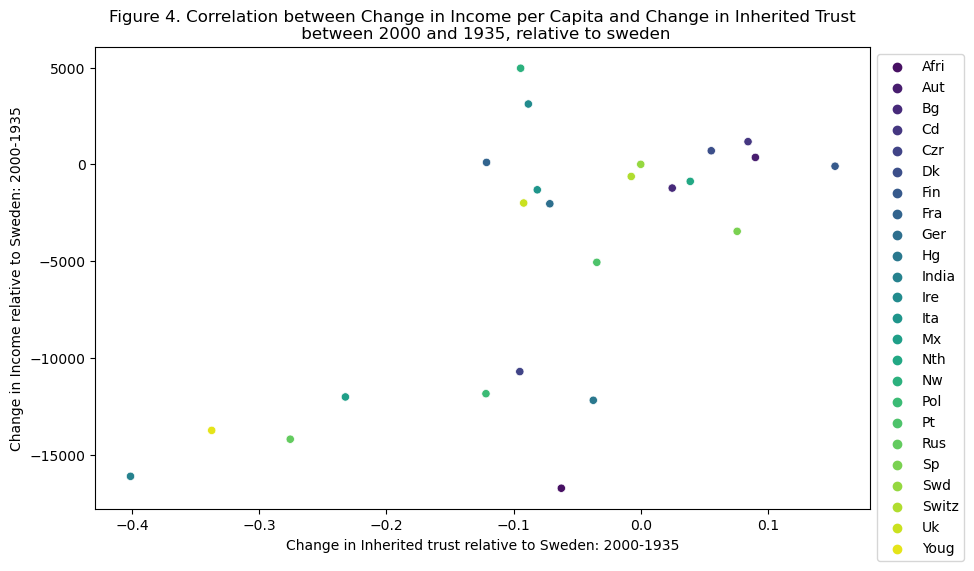

In [664]:
# Plotting
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='change_trust', y='change_gdpk', data=filtered_data, hue='cty', palette='viridis')

plt.xlabel('Change in Inherited trust relative to Sweden: 2000-1935')
plt.ylabel('Change in Income relative to Sweden: 2000-1935')
plt.title('Figure 4. Correlation between Change in Income per Capita and Change in Inherited Trust\n between 2000 and 1935, relative to sweden')

# Move the legend outside of the plot area
scatter.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Figure 4 reports a scatterplot of the changes in income per capita between 1935 and 2000 against the changes in inherited trust between the same periods, relative tp Sweden. Different than the steady positive relationship in the paper, the replication result showed a weaker correlation, with some outliers. 

### Table 6: Inherited Trust and Income per Capita in 1935 And 2000: within Estimate

In [665]:
# Regression 1
model1 = sm.OLS(filtered_data['gdpk_diffswd_good'], sm.add_constant(filtered_data['trustgss'])).fit()

# Regression 2
model2 = sm.OLS(filtered_data['gdpk_diffswd_good'], sm.add_constant(filtered_data[['trustgss', 'gdpk_diffswd_good_1']])).fit()

# Regression 3 (excluding observations with cty=="Afri")
filtered_data_excluded = filtered_data[filtered_data['cty'] != "Afri"]
model3 = sm.OLS(filtered_data_excluded['gdpk_diffswd_good'], sm.add_constant(filtered_data_excluded[['trustgss', 'gdpk_diffswd_good_1']])).fit()

# Regression 4
filtered_data.replace([np.inf, -np.inf], np.nan, inplace=True)
filtered_data.dropna(subset=['gdpk_diffswd_good', 'trustgss', 'gdpk_diffswd_good_1', 'polity2diff'], inplace=True)
model4 = sm.OLS(filtered_data['gdpk_diffswd_good'], sm.add_constant(filtered_data[['trustgss', 'gdpk_diffswd_good_1', 'polity2diff']])).fit()

# Regression 5
model5 = sm.OLS(filtered_data['gdpk_diffswd_goodsmooth'], sm.add_constant(filtered_data[['trustgss', 'gdpk_diffswd_good_1', 'polity2diff']])).fit()

In [666]:
# Combine the results of both regressions into one table
results_summary = summary_col([model1, model2, model3, model4, model5], 
                              model_names=['1\n without controls', '2\n change in income\n per capita', '3\n potential outliers\n excluding Africa', '4\n political institutions', '5\n alternative measure\n 1935 and 2000'], 
                              float_format='%0.4f',
                              stars=True)

# Print the combined results table
print('Table 6 - Inherited Trust and Income per Capita in 1935 And 2000: within Estimate')
print(results_summary)

Table 6 - Inherited Trust and Income per Capita in 1935 And 2000: within Estimate

                            1                 2                  3                     4                     5          
                     without controls  change in income  potential outliers  political institutions  alternative measure
                                          per capita      excluding Africa                              1935 and 2000   
------------------------------------------------------------------------------------------------------------------------
R-squared           0.5452            0.7498            0.7082              0.7325                  0.7752              
R-squared Adj.      0.5246            0.7260            0.6790              0.6902                  0.7397              
const               -3166.9340**      -2316.1715**      -2305.9032**        -2140.8750**            -1843.4873**        
                    (1179.5199)       (918.7228)        (937.6091)    

Table 6 reports the within effect of inherited trust on economic development controlling for country fixed effects. Without additional controls, there is a strong correlation between the change in inherited trust and the change in income per capita. When controlling for changes in initial income per capita, the coefficient associated with inherited trust is slightly reduced but remains statistically significant at the 1 percent level. This suggests that **inherited trust still has a significant impact on economic development even when considering initial income levels**. Excluding Africa from the analysis to check for potential outliers does not substantially change the results. Even after accounting for political factors, the correlation between change in inherited trust and change in income per capita remains significant at the 1 percent level. And the last column showed the robustness of the findings to different measures of income by calculating the 10-year average instead of 4. This table aligned with the origin implication of the impact of inherited trust on income per capita. 

### Increase in GDP If Same Inherited Trust Than in Sweden

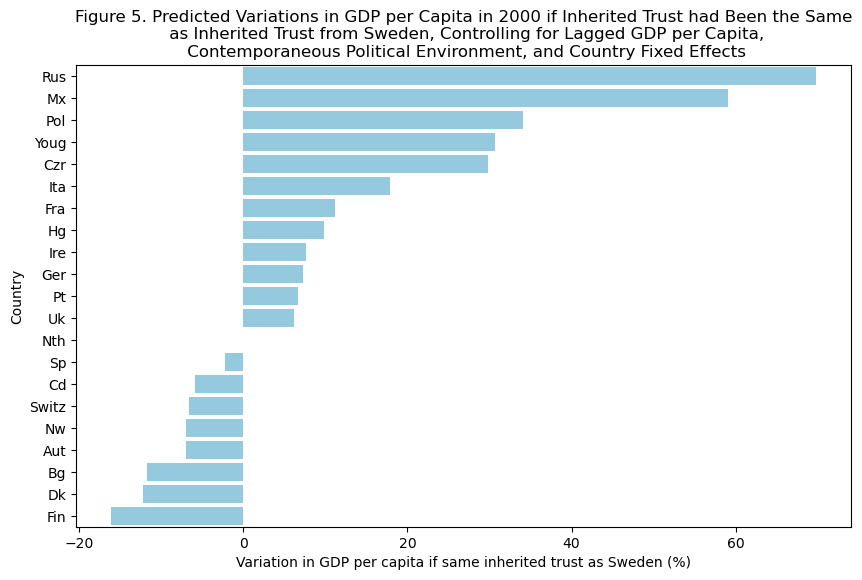

In [667]:
# Calculate the change in GDP per capita if same inherited trust as Sweden
filtered_data['gdpk_change_trust0'] = -28230.15 * filtered_data['trustgss']
filtered_data['pgdpk_change_trust0'] = 100 * (filtered_data['gdpk_change_trust0'] / filtered_data['gdpkmad'])

# Filter data for the year 2000 and exclude specific countries
filtered_data_2000 = filtered_data[(filtered_data['period'] == 2000) & 
                                   (filtered_data['Nsample1935'] == 0) & 
                                   (~filtered_data['cty'].isin(['India', 'Swd', 'Afri']))]

# Sort the data in descending order
filtered_data_2000 = filtered_data_2000.sort_values(by='pgdpk_change_trust0', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='pgdpk_change_trust0', y='cty', data=filtered_data_2000, color='skyblue', order=filtered_data_2000['cty'])

plt.xlabel('Variation in GDP per capita if same inherited trust as Sweden (%)')
plt.ylabel('Country')
plt.title('Figure 5. Predicted Variations in GDP per Capita in 2000 if Inherited Trust had Been the Same\n as Inherited Trust from Sweden, Controlling for Lagged GDP per Capita,\n Contemporaneous Political Environment, and Country Fixed Effects')

plt.show()

Figure 5 shows that inherited trust also has a nonnegligible impact on GDP per capita in Eastern European countries and Mexico. Income per capita would have increased by ~67 percent in Russia, 59 percent in Mexico, ~35 percent in the Czech Republic, and ~10 percent in Hungary had these countries inherited the same level of trusts as Sweden. 

### Increase in GDP If Same Initial Income per Capita Than in Sweden

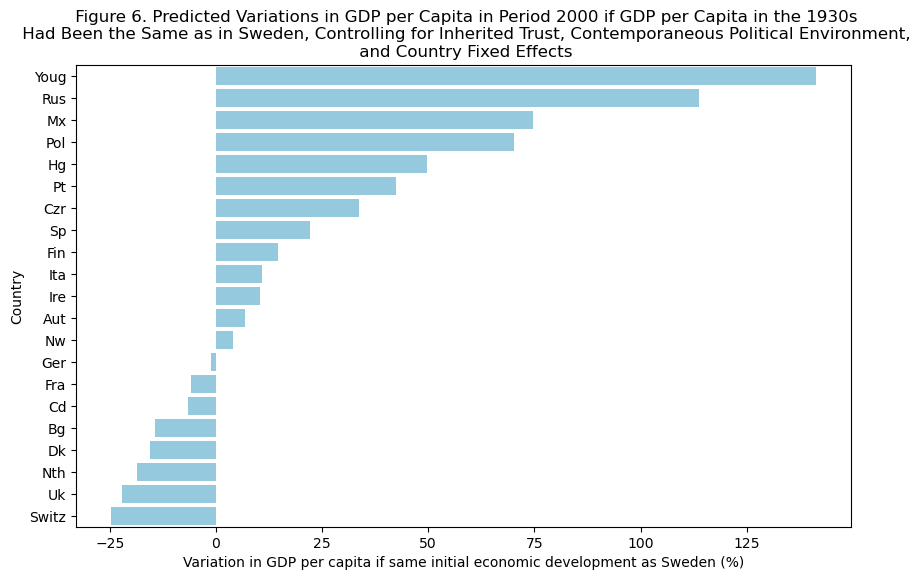

In [668]:
# Calculate the change in GDP per capita if same initial income per capita as Sweden
filtered_data['gdpk_change_gdp0'] = -2.814842 * filtered_data['gdpk_diffswd_good_1']
filtered_data['pgdpk_change_gdp0'] = 100 * (filtered_data['gdpk_change_gdp0'] / filtered_data['gdpkmad'])

# Filter data for the year 2000 and exclude specific countries
filtered_data_2000 = filtered_data[(filtered_data['period'] == 2000) & 
                                   (filtered_data['Nsample1935'] == 0) & 
                                   (~filtered_data['cty'].isin(['India', 'Swd', 'Afri']))]

# Sort the data in descending order
filtered_data_2000 = filtered_data_2000.sort_values(by='pgdpk_change_gdp0', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='pgdpk_change_gdp0', y='cty', data=filtered_data_2000, color='skyblue', order=filtered_data_2000['cty'])

plt.xlabel('Variation in GDP per capita if same initial economic development as Sweden (%)')
plt.ylabel('Country')
plt.title(' Figure 6. Predicted Variations in GDP per Capita in Period 2000 if GDP per Capita in the 1930s\n Had Been the Same as in Sweden, Controlling for Inherited Trust, Contemporaneous Political Environment,\n and Country Fixed Effects')

plt.show()

Figure 6 shows the predicted increase in income per capita in 2000. Russia and Mexico would have an income per capita 123 percent and 74 percent higher. But countries which used to be more developed than Sweden, like the United Kingdom or France, would have experienced a drop in income per capita by 22 percent and 5 percent respectively.


### Fixed Effects

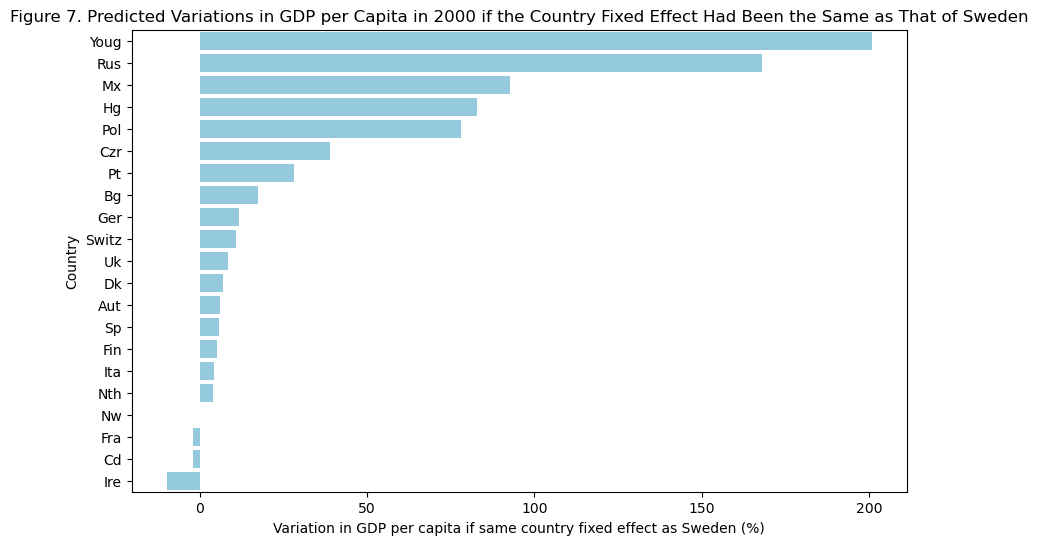

In [669]:
# Calculate the change in GDP per capita if same country fixed effect as Sweden
filtered_data['pgdpk_change_fixed'] = -100 * (filtered_data['fixed'] / filtered_data['gdpkmad'])

# Filter data for the year 2000 and exclude specific countries
filtered_data_2000 = filtered_data[(filtered_data['period'] == 2000) & 
                                   (filtered_data['Nsample1935'] == 0) & 
                                   (~filtered_data['cty'].isin(['India', 'Swd', 'Afri']))]

# Sort the data in descending order
filtered_data_2000 = filtered_data_2000.sort_values(by='pgdpk_change_fixed', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='pgdpk_change_fixed', y='cty', data=filtered_data_2000, color='skyblue', order=filtered_data_2000['cty'])

plt.xlabel('Variation in GDP per capita if same country fixed effect as Sweden (%)')
plt.ylabel('Country')
plt.title('Figure 7. Predicted Variations in GDP per Capita in 2000 if the Country Fixed Effect Had Been the Same as That of Sweden')

plt.show()


Figure 7 reports the contribution of time invariant factors. We calculate the predicted increase in income per capita if the countries had the same country fixed effect as Sweden. Eastern European countries would have undergone an increase by ~200 percent in Yugoslavia (that double the income per capita), ~170 percent in Russia, and ~80 percent in Hungary. However, the invariant factors had smaller effects among 'advanced' European countries such as France or Italy. 

In the original paper, the writes also included impact and predicted income per capita value of Africa, the one that is not included in the graphing process. However, in this paper, since I skipped the regression on countries' GDP (including Afirca) in table 6, the percentage change drawn from figure 5, 6 and 7 are approximately estimated from the graphs. 

# Robustness Checks 

## A. Other Trust Indicators

In [670]:
# TRUST 123 Robustness Check
X_vars = ['age', 'men', 'ageedu', 'incomegood', 'catho', 'pro', 'unemployed', 'employed']

X = data_1935[X_vars + countries]
X = sm.add_constant(X)
y = data_1935['trust']

model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_1935 = model.fit()

In [671]:
X = data_2000[X_vars + countries]
X = sm.add_constant(X)
y = data_2000['trust']

model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_2000 = model.fit()


In [672]:
print('TRUST 123 Robustness Check\n')
# Combine the results of both regressions into one table
results_summary = summary_col([results_1935, results_2000], 
                              model_names=['Inherited Trust in 1935', 'Inherited Trust in 2000'], 
                              float_format='%0.4f',
                              stars=True)

# Print the combined results table
print(results_summary)

TRUST 123 Robustness Check


           Inherited Trust in 1935 Inherited Trust in 2000
----------------------------------------------------------
const      2.1695***               2.2344***              
           (0.0497)                (0.0547)               
age        -0.0028***              -0.0045***             
           (0.0004)                (0.0005)               
men        -0.0136                 -0.0306**              
           (0.0124)                (0.0145)               
ageedu     -0.0343***              -0.0387***             
           (0.0022)                (0.0030)               
incomegood -0.0130***              -0.0077**              
           (0.0026)                (0.0030)               
catho      -0.0587**               0.0123                 
           (0.0266)                (0.0233)               
pro        -0.0160                 -0.0010                
           (0.0235)                (0.0225)               
unemployed 0.0011          

In [673]:
# TRUST no depends Robustness Check
# Create the 'trust_nodepends' column in micro_data then filter
micro_data['trust_nodepends'] = micro_data['trust'].map({1: 1, 2: 0})

# Create the 'trust_nodepends' column in micro_data then filter
X = micro_data[['age', 'men', 'ageedu', 'incomegood', 'catho', 'pro', 'unemployed', 'employed']]
y = micro_data['trust_nodepends']

X = sm.add_constant(X)

model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results = model.fit()

print('Trust no depends Robustness Check\n')
print(results.summary())

Trust no depends Robustness Check

                    Robust linear Model Regression Results                    
Dep. Variable:        trust_nodepends   No. Observations:                11895
Model:                            RLM   Df Residuals:                    11886
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 22 Mar 2024                                         
Time:                        21:48:24                                         
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.

In [674]:
# TRUST alternative Robustness Check
micro_data['trust_alter'] = micro_data['trust'].map({1: 1, 3: 1, 2: 0})

# Create the 'trust_alter' column in micro_data then filter
X = micro_data[['age', 'men', 'ageedu', 'incomegood', 'catho', 'pro', 'unemployed', 'employed']]
y = micro_data['trust_alter']

X = sm.add_constant(X)

model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results = model.fit()

print('Trust Alternative Robustness Check\n')
print(results.summary())

Trust Alternative Robustness Check

                    Robust linear Model Regression Results                    
Dep. Variable:            trust_alter   No. Observations:                11895
Model:                            RLM   Df Residuals:                    11886
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 22 Mar 2024                                         
Time:                        21:48:24                                         
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0

The results indicate that variables such as age, gender (`men`), education level (`ageedu`), and income have statistically significant effects on trust, as evidenced by their low p-values. However, variables such as religious affiliation (`catho` and `pro`), unemployment status, and employment status do not show statistically significant effects on trust, as their p-values are higher than the conventional threshold of 0.05.

It's worth noting that the robustness of these findings relies on the chosen robust regression method and the assumption of Huber's T norm for scale estimation. This meant downweighting the influence of outliers and violations of OLS regression assumptions. 

## B. Longer Generation Gaps

### 50-Year Lag Regression

In [ ]:
# Define the independent variables
independent_vars = ['age', 'men', 'ageedu', 'Afri', 'Cd', 'Czr', 'Dk', 'Fra', 'Ger', 'Ire', 'Ita', 'Nth', 'Nw', 'Pol', 'Sp', 'Switz', 'Uk']

# Define the condition for cohort born with a 50-year lag from 2000
condition_2000_lag = (micro_data['cty_okrm'] == 1) & ((micro_data['gen2_test'] == 1) & ((micro_data['naiss'] > 1885) | (micro_data['naiss'] <= 1950)) | 
                                                      (micro_data['gen3_test'] == 1) & (micro_data['naiss'] > 1910) | 
                                                      (micro_data['gen4_test'] == 1) & (micro_data['naiss'] > 1935))

# Perform regression for cohort born with a 50-year lag from 2000
X_2000_lag = sm.add_constant(micro_data[independent_vars])
y_2000_lag = micro_data['trust10_large']
model_2000_lag = sm.OLS(y_2000_lag, X_2000_lag).fit()

In [ ]:
# Define the condition for cohort born with a 50-year lag from 1935
condition_1935_lag = (micro_data['cty_okrm'] == 1) & ((micro_data['gen2_test'] == 1) & (micro_data['naiss'] <= 1885) | 
                                                      (micro_data['gen3_test'] == 1) & (micro_data['naiss'] <= 1910) | 
                                                      (micro_data['gen4_test'] == 1) & (micro_data['naiss'] <= 1935))

# Perform regression for cohort born with a 50-year lag from 1935
X_1935_lag = sm.add_constant(micro_data[independent_vars])
y_1935_lag = micro_data['trust10_large']
model_1935_lag = sm.OLS(y_1935_lag, X_1935_lag).fit()

In [ ]:
# Combine the results of both regressions into one table
results_summary = summary_col([model_1935_lag, model_2000_lag], 
                              model_names=['50-Year Lag from 1935', '50-Year Lag from 20000'], 
                              float_format='%0.4f',
                              stars=True)

# Print the combined results table
print(results_summary)


               50-Year Lag from 1935 50-Year Lag from 20000
-----------------------------------------------------------
const          -0.2601***            -0.2601***            
               (0.0291)              (0.0291)              
age            0.0038***             0.0038***             
               (0.0003)              (0.0003)              
men            0.0361***             0.0361***             
               (0.0087)              (0.0087)              
ageedu         0.0402***             0.0402***             
               (0.0016)              (0.0016)              
Afri           -0.2378***            -0.2378***            
               (0.0195)              (0.0195)              
Cd             0.0353                0.0353                
               (0.0364)              (0.0364)              
Czr            0.0209                0.0209                
               (0.0374)              (0.0374)              
Dk             0.0703                0.

The results suggest that age, gender, education, and the presence of immigrants from certain countries or regions have a significant impact on the dependent variable. An increased lag between variables (up to two generations or 50 years) allows for more time for the effects of independent variables to manifest and be accurately measured. The correlation coefficients remained steady, accounting for longer-term effects and mitigating potential biases from omitted time-varying factors.

### Visual Presentation

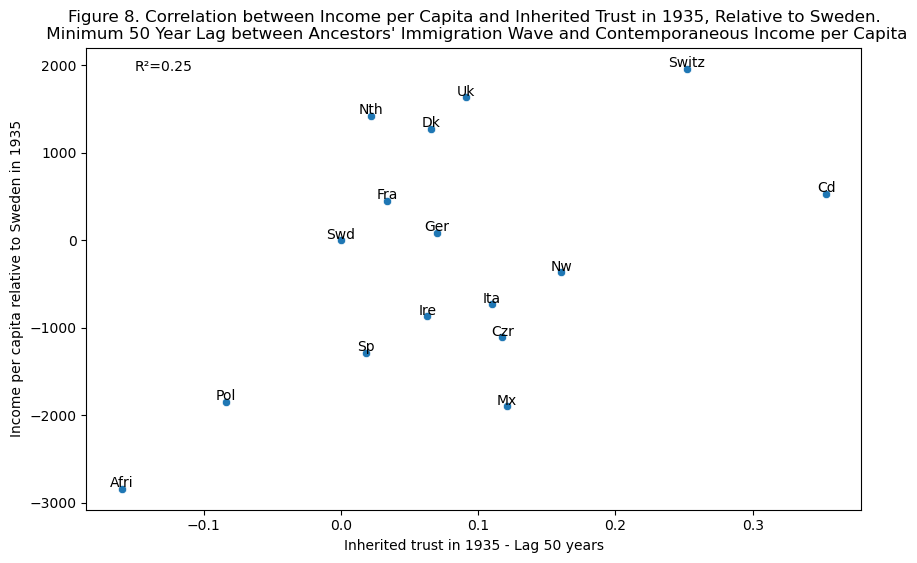

In [675]:
# Filter the data for the year 1935
filtered_data_1935 = macro_data_cleaned[macro_data_cleaned['period'] == 1935]

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trustgss50yearslag', y='gdpk_diffswd_good', data=filtered_data_1935)

for index, row in filtered_data_1935.iterrows():
    plt.annotate(row['cty'], (row['trustgss50yearslag'], row['gdpk_diffswd_good']), textcoords="offset points", xytext=(0,1), ha='center')

plt.xlabel('Inherited trust in 1935 - Lag 50 years')
plt.ylabel('Income per capita relative to Sweden in 1935')
plt.title("Figure 8. Correlation between Income per Capita and Inherited Trust in 1935, Relative to Sweden.\n Minimum 50 Year Lag between Ancestors' Immigration Wave and Contemporaneous Income per Capita")

plt.annotate('R²=0.25', xy=(0.1, 0.95), xycoords='axes fraction', ha='center', fontsize=10)

plt.show()

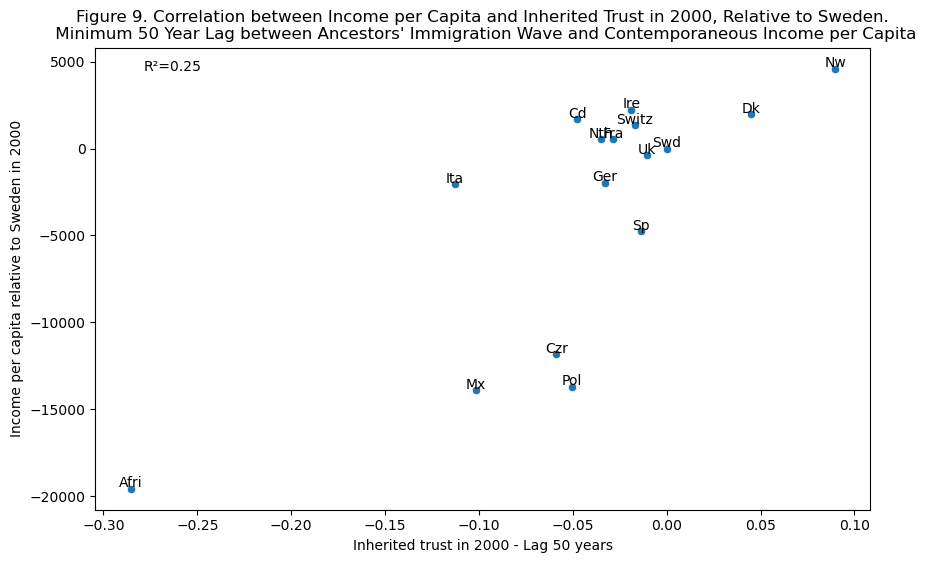

In [676]:
# Filter the data for the year 2000
filtered_data_2000 = macro_data_cleaned[macro_data_cleaned['period'] == 2000]

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trustgss50yearslag', y='gdpk_diffswd_good', data=filtered_data_2000)

for index, row in filtered_data_2000.iterrows():
    plt.annotate(row['cty'], (row['trustgss50yearslag'], row['gdpk_diffswd_good']), textcoords="offset points", xytext=(0,1), ha='center')

plt.xlabel('Inherited trust in 2000 - Lag 50 years')
plt.ylabel('Income per capita relative to Sweden in 2000')
plt.title("Figure 9. Correlation between Income per Capita and Inherited Trust in 2000, Relative to Sweden.\n Minimum 50 Year Lag between Ancestors' Immigration Wave and Contemporaneous Income per Capita")

plt.annotate('R²=0.25', xy=(0.1, 0.95), xycoords='axes fraction', ha='center', fontsize=10)

plt.show()

Figures 8 and 9 report the correlation between income per capita and inherited trust when we impose a lag of at least 50 years between the inherited trust of the US immigrants' ancestors and income per capita in the home country. The correlation remains steady.

## C. Table 9: Longer Period Gaps with Income Per Capita Between 1910 and 2000 

In [677]:
# Filter the data based on the specified conditions
filtered_data = macro_data_cleaned[(macro_data_cleaned['Nsample1910'] == 0) & (macro_data_cleaned['period19102000'] == 1)]

# Regression 1: Regress gdpk_diffswd_good on trustgss_1910_2000
model1 = sm.OLS(filtered_data['gdpk_diffswd_good'], sm.add_constant(filtered_data['trustgss_1910_2000'])).fit()

# Regression 2: Regress gdpk_diffswd_good on trustgss_1910_2000 and gdpk_diffswd_good_2
model2 = sm.OLS(filtered_data['gdpk_diffswd_good'], sm.add_constant(filtered_data[['trustgss_1910_2000', 'gdpk_diffswd_good_2']])).fit()

# Regression 3: Regress gdpk_diffswd_good on trustgss_1910_2000, gdpk_diffswd_good_2, and polity2diff19102000
model3 = sm.OLS(filtered_data['gdpk_diffswd_good'], sm.add_constant(filtered_data[['trustgss_1910_2000', 'gdpk_diffswd_good_2', 'polity2diff19102000']])).fit()

In [678]:
# Combine the results of both regressions into one table
results_summary = summary_col([model1, model2, model3], 
                              model_names=['1\n without controls', '2\n lagged income per capita\n 1870 and 1930', '3\n political institutions\n average over the period'], 
                              float_format='%0.4f',
                              stars=True)

# Print the combined results table
print('Table 9 - Inherited Trust and Income Per Capita in 1910 and 2000: Cross-Country Regression\n')
print('Dependent variable: Income per capita in 1910 and 2000')
print(results_summary)

Table 9 - Inherited Trust and Income Per Capita in 1910 and 2000: Cross-Country Regression

Dependent variable: Income per capita in 1910 and 2000

                            1                     2                        3            
                     without controls  lagged income per capita  political institutions 
                                             1870 and 1930       average over the period
----------------------------------------------------------------------------------------
R-squared           0.5065            0.6680                    0.6830                  
R-squared Adj.      0.4686            0.6127                    0.5965                  
const               785.9182          -387.2500                 -540.6208               
                    (1616.6787)       (1463.1609)               (1508.4453)             
gdpk_diffswd_good_2                   3.0957**                  2.7585*                 
                                      (1.2814)     

Table 9 reports the regressions including both periods 1910 and 2000 at the cross-country level. Overall, the cross-country correlation is statistically significant at the 1% level, indicating a robust relationship. From that, we can tell **the inherited trust, historical income levels, and contemporary political institutions all play important roles in determining income per capita in 1910 and 2000 at the cross-country level**. The additional controls helped higlighting the significance of differents factors in explaning the income disparities among countries across the time with the complex interplay of social, historical, and institutional factors in driving economic development.

# Conclusion
Looking back, the replication showed that the inherited trust, measured by various indicators, is consistently associated with higher income per capita across different times and different countries. The lagged income per capita (representing the historical aspect) and political institutions played significant roles in shaping present income disparities. 

While replicating this paper, I struggled a lot with the Macro dataset because of the missing data as well as the inconveniently organized spreadsheet. Replacing data and experiencing around with different methods to clean and filter the data for each model required careful consideration. I also had trouble presenting the table format for combining different regressions. I experienced a few methods and kept two that were visually pleasing. 

This replication exercise helps me understand the producing process of an academic paper. Fortunately, the Do-file is easy to follow, with logical order and pretty much aligning with the paper. I skipped a fews tables at the end of the papers, where the original writers experiened around with different control factors and time cohort to demonstrate the comprehensive cover of the method. The replication are quite close with the original results, relatively higher but still maintaning the correlation among variables. The regression models in Python are also cover a larger sample than the original Stata one. This could be attributed to the software differences and the way they handle outliers or process the data. 

# <center> Reference  </center>
Algan, Yann, and Pierre Cahuc. 2010. "Inherited Trust and Growth." American Economic Review 100, no. 5 (September): 2060-2092. Accessed [March 22 2024]. https://www.jstor.org/stable/41038755.